# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pickle

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("../../../")
from src import funciones_problemas_regresion as fpr

In [2]:
df =  pd.read_pickle("../../../datos/cluster_2/df_nonulls_encoded_sinout_scaled.pkl").reset_index(drop=True)
variable_respuesta = "Profit"

df.head()

,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,365.64,0.365711,0.316102,1.230052,1.129815,-0.584694,7.512120,-0.411925,-0.245822,-0.509110,0.829990,0.982319,-0.653793,-0.486891,-0.287291,-0.661181,-0.221,0.863238
1,61.56,0.733315,-0.650881,3.747184,-0.052832,-0.584694,7.379764,-0.411925,-0.245822,1.964212,-1.204834,0.982319,-0.653793,-0.486891,-0.287291,-0.661181,-0.221,0.863238
2,209.76,0.562860,0.316102,3.747184,-0.052832,-0.584694,7.309039,-0.411925,-0.245822,-0.509110,0.829990,-1.017999,-0.653793,2.053847,-0.287291,-0.661181,-0.221,0.863238
3,70.50,0.597107,-0.650881,1.230052,-0.052832,-0.584694,7.154455,-0.411925,-0.245822,-0.509110,0.829990,0.982319,-0.653793,-0.486891,-0.287291,1.512446,-0.221,-1.158430
4,372.48,0.738395,0.316102,1.230052,1.129815,-0.584694,7.136268,-0.411925,-0.245822,1.964212,-1.204834,-1.017999,1.529537,-0.486891,-0.287291,-0.661181,-0.221,0.863238


In [3]:
#df = df.drop(columns=["Ship Mode_First Class", "Ship Mode_Same Day","Ship Mode_Second Class", "Ship Mode_Standard Class", "Segment_Consumer", "Segment_Corporate", "Segment_Home Office", "Order Priority_Critical", "Order Priority_High",	"Order Priority_Low","Order Priority_Medium"])

Probaremos varios modelos de ensamble y compararemos sus métricas a ver cual es el que arroja mejores resultados.

## Random Forest Regressor

In [11]:
variable_respuesta = "Profit"
modelo = "RandomForestRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [50, 100, 150], #número de árboles que queremos en el bosque
    'max_depth': [15, 20, 30],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [15, 20, 25], 
    'max_leaf_nodes': [100, 200, 300]
}

df_metricas, modelo_random_forest_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 20, 'max_leaf_nodes': 200, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 150}


,r2_scores,MAE,MSE,RMSE
train,0.638845,10.724279,724.608027,26.918544
test,0.578202,12.338202,651.277654,25.520142


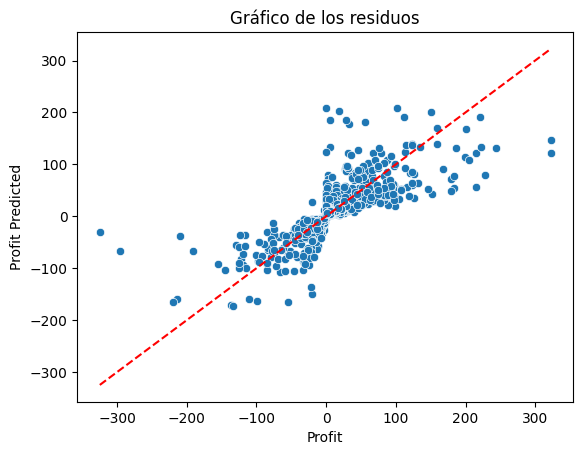

In [12]:
clase_arbol.visualizacion_residuos()

Estas son sin duda las mejores métricas obtenidas, con apenas overftting y un RMSE en el test de 25 lo cual es bastante bueno, siendo este el mejor modelo de predicción.

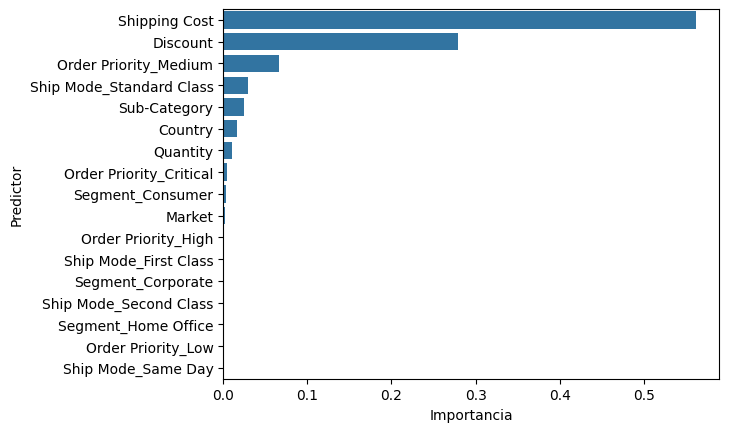

In [13]:
clase_arbol.importancias_variables()

No nos sorprende de nuevo que las variables más importantes a la hora de predecir sean aquellas con las cuales tiene más correlacion la variable rspuesta como vimos en el EDA.

## Gradient Boosting Regressor

In [6]:
modelo = "GradientBoostingRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [50, 100, 150], #número de árboles que queremos en el bosque
    'max_depth': [15, 20, 30],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [15, 20, 25], 
    'max_leaf_nodes': [100, 200, 300]
}

df_metricas, modelo_grad_boosting_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con GradientBoostingRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 15, 'max_leaf_nodes': 200, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 50}


,r2_scores,MAE,MSE,RMSE
train,0.792085,7.885007,417.153721,20.424341
test,0.524949,12.584178,733.503678,27.083273


## XGBRegressor

In [7]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [60, 65, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight':  [3, 4, 5, 6],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 60, 'subsample': 1.0}


,r2_scores,MAE,MSE,RMSE
train,0.830143,9.930068,340.794584,18.460623
test,0.525201,12.512699,733.114782,27.076092
